In [1]:
%pip install matplotlib
%pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt   #Used to create the graphs
import math

e = math.e

#function definitions for Set A: both x(t) and dx / dt

def mountain_lion_xt(t : float, **constants):
    r = constants.get("r")
    L = constants.get("L")
    return (L*0.5*pow(e,r*t)) / (L+0.5*(-1+pow(e,r*t)))

def mountain_lion_dxdt(t : float, x : float,  **constants) -> float:
    r = constants.get("r")
    L = constants.get("L")
    return (r*x)*(1-x/L)

#x_0: given initial amount
#t_interval: expect a tuple (start, stop) - inclusive on both ends
#h: step size
#dxdt: derivative function that is called (just put the name of the function) (e.g. dxdt = mountain_lion_dxdt)
#**constants: pass in keyword constants that dxdt might need (e.g. r=r, L=L)

def eulers_method(x_0 : float, t_interval : tuple, h : float, dxdt : callable, **constants) -> list: 
    t_list = np.arange(start=t_interval[0] + h, stop=t_interval[1] + h, step=h)
    x_value_euler = [x_0]
    
    for t in t_list: 
        deriv = dxdt(t, x_value_euler[-1], **constants)   #Calculate change in x
        x_value_euler.append(x_value_euler[-1] + deriv * h)       #Calculate x value for next step of Euler's

    t_list = np.insert(t_list, 0, t_interval[0])
    return [t_list, x_value_euler]

#t_interval: expect a tuple (start, stop) - inclusive on both ends
#num_points: number of points generated for both axes
#xt: function that is called to generate height values of plot
#**constants: pass in keyword constants that xt might need (e.g. r=r, L=L)

def get_plot(t_interval : tuple, num_points : int, xt : callable, **constants) -> list: 
    t_list = np.linspace(start=t_interval[0], stop=t_interval[1], num=num_points)
    x_list = []

    for t in t_list: 
        x_list.append(xt(t, **constants))
        
    return [t_list, x_list]

[array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]), [0.5, 0.6474537037037037, 0.8326467505568733, 1.0615305188130055, 1.338708439506731, 1.665928387355284, 2.0403221220728334, 2.452881039970313, 2.8879556642977207, 3.3245794822947543, 3.7398512698588906, 4.113523591041516, 4.432020645432249, 4.690221378253332, 4.890578995161037, 5.040522178760437, 5.149575081998846, 5.227188808524099, 5.28155509296353, 5.319205337990951, 5.345070727651674, 5.362741148921874, 5.3747667251251, 5.382929218459017, 5.388459683799783, 5.392202271168215, 5.394732873503943, 5.396443019920348, 5.397598276976815, 5.398378489794743, 5.398905322366824, 5.3992610204765485, 5.3995011559550985, 5.399663265292886, 5.399772697248284, 5.399846567533031, 5.399896431667946, 5.399930090730293, 5.399952

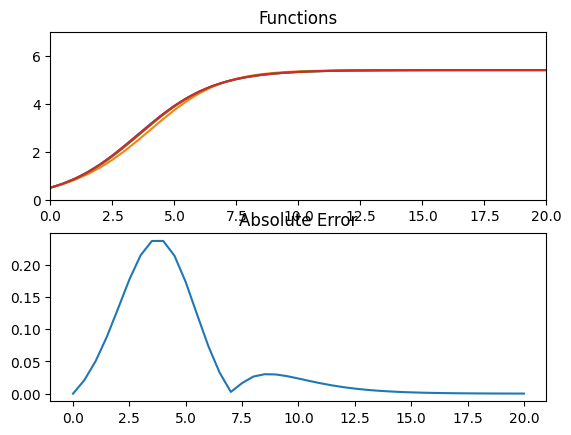

In [ ]:
#Task set A, problem 2, h = 0.5
e = math.e

r = 0.65                                 #Constant rate
L = 5.4                                 #Constant carrying capacity

h_1 = 0.5
h_2 = 0.1
h_3 = 0.01

#generate euler's method plots for all 3 step sizes
euler_plot_h1 = eulers_method(x_0=0.5, t_interval=(0, 20), h=h_1, dxdt=mountain_lion_dxdt, r=r, L=L) 
euler_plot_h2 = eulers_method(x_0=0.5, t_interval=(0, 20), h=h_2, dxdt=mountain_lion_dxdt, r=r, L=L) 
euler_plot_h3 = eulers_method(x_0=0.5, t_interval=(0, 20), h=h_3, dxdt=mountain_lion_dxdt, r=r, L=L) 

#get actual plots (we will only plot 1 actual plot, but generating 2 others that have the same number of points as their respective euler's method plot to simply the error plot calculations)
actual_plot_1 = get_plot(t_interval=(0, 20), num_points=len(euler_plot_h1[0]), xt=mountain_lion_xt, r=r, L=L)
actual_plot_2 = get_plot(t_interval=(0, 20), num_points=len(euler_plot_h2[0]), xt=mountain_lion_xt, r=r, L=L)
actual_plot_3 = get_plot(t_interval=(0, 20), num_points=len(euler_plot_h3[0]), xt=mountain_lion_xt, r=r, L=L)

#error plot calculations
error_plot_1 = [actual_plot_1[0], list(map(abs, np.array(actual_plot_1[1]) - np.array(euler_plot_h1[1])))]
error_plot_2 = [actual_plot_2[0], list(map(abs, np.array(actual_plot_2[1]) - np.array(euler_plot_h2[1])))]
error_plot_3 = [actual_plot_3[0], list(map(abs, np.array(actual_plot_3[1]) - np.array(euler_plot_h3[1])))]

figure, axes = plt.subplots(2, 1)             #Required for multiple plots     (2 rows 1 col)

print(euler_plot_h1)

#x and y bounds
axes[0].set_xlim((0, 20))
axes[0].set_ylim((0, 7))

#graphing each of our plots
axes[0].plot(actual_plot_1[0], actual_plot_1[1])
axes[0].plot(euler_plot_h1[0], euler_plot_h1[1])
axes[0].plot(euler_plot_h2[0], euler_plot_h2[1])
axes[0].plot(euler_plot_h3[0], euler_plot_h3[1])

axes[1].plot(error_plot_1[0], error_plot_1[1])

#axes[0].plot(t ,x)                           #Create Euler's plot             (1st column plot)
#axes[0].plot(t, xActual)                     #Create actual function plot     (1st column plot)
#axes[1].plot(t, yError)                      #Create error plot               (2nd column plot)

#plt.semilogy()

#axes[0].xlabel('Time')
#axes[0].ylabel('Population')
#axes[0].legend(['Approximation', 'Actual'])
axes[0].set_title('Functions')                        #Add title to plot

#axes[1].xlabel('Time')
#axes[1].ylabel('Error')
#axes[1].legend(['Absolute Error'])
axes[1].set_title('Absolute Error')                   #Add title to plot

plt.show()                                            #Print plot











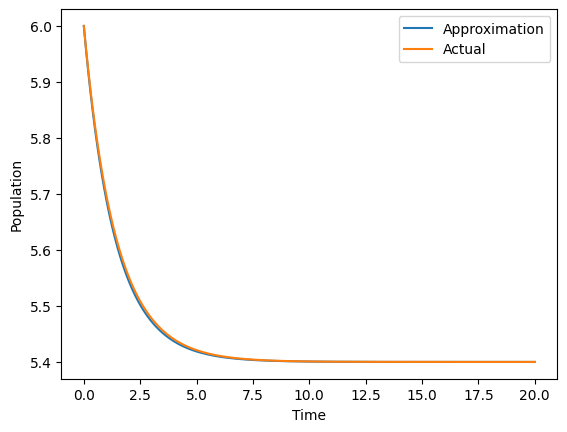

In [38]:
#Task set A, problem 2, h = 0.1

import matplotlib.pyplot as plt
import math

e = math.e

r = 0.65
L = 5.4
h = 0.1                                  #Step size 0.1
t = [0]
x = [6]
xActual = [6]
tVariable = 0
xVariable = 6


while tVariable <= 20:
    dx = (r*xVariable)*(1-xVariable/L)
    xVariable = xVariable + dx * h
    tVariable += 0.1
    x.append(xVariable)
    t.append(tVariable)
    xActual.append((L*6*pow(e,r*tVariable))/(L+6*(-1+pow(e,r*tVariable))))


plt.plot(t ,x)
plt.plot(t, xActual)

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Approximation', 'Actual'])

plt.show()











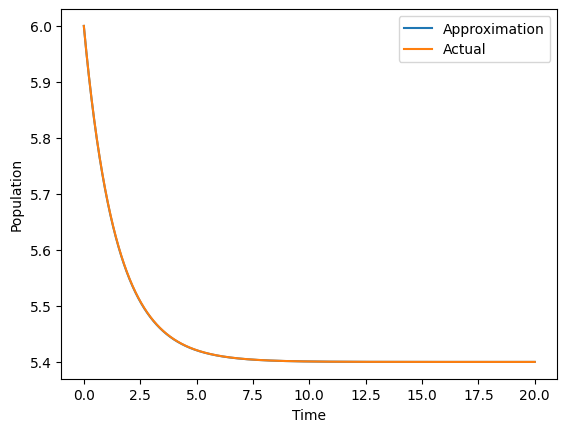

In [ ]:
#Task set A, problem 2, h = 0.01

import matplotlib.pyplot as plt
import math

e = math.e

r = 0.65
L = 5.4
h = 0.01                                  #Step size 0.01
t = [0]
x = [6]
xActual = [6]
tVariable = 0
xVariable = 6


while tVariable <= 20:
    dx = (r*xVariable)*(1-xVariable/L)
    xVariable = xVariable + dx * h
    tVariable += 0.01
    x.append(xVariable)
    t.append(tVariable)
    xActual.append((L*6*pow(e,r*tVariable))/(L+6*(-1+pow(e,r*tVariable))))


plt.plot(t ,x)
plt.plot(t, xActual)

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Approximation', 'Actual'])

plt.show()











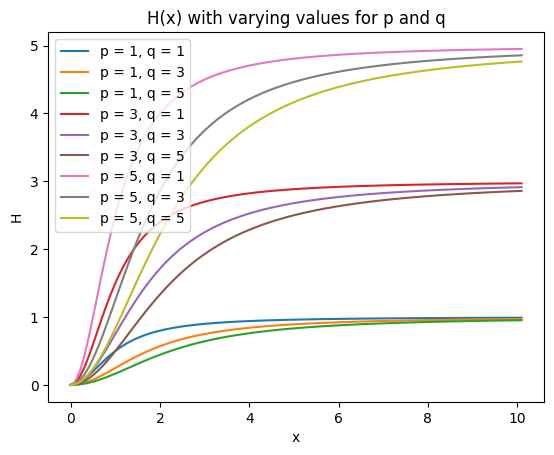

In [1]:
#2.1.5, Harvesting equation

import matplotlib.pyplot as plt
import math

p = 1
q = 1

h = [0]
x = [0]
xVariable = 0
hVariable = 0

hEquation = (p*pow(xVariable,2))/(q+pow(xVariable,2))




#figure, axes = plt.subplots(3, 3)
#figure.tight_layout()


while p <= 5:
    while q <= 5:
        while xVariable < 10:
            xVariable += 0.1
            hVariable = (p*pow(xVariable,2))/(q+pow(xVariable,2))
            h.append(hVariable)
            x.append(xVariable)
        #axes[(math.floor(p/2)), math.floor(q/2)].plot(x, h)
        plt.plot(x, h)
        q += 2
        x = [0]
        h = [0]
        xVariable = 0
        hVariable = 0
    p += 2
    q = 1

#axes[0, 0].set_title('p = 1, q = 1')
#axes[0, 1].set_title('p = 1, q = 3')
#axes[0, 2].set_title('p = 1, q = 5')
#axes[1, 0].set_title('p = 3, q = 1')
#axes[1, 1].set_title('p = 3, q = 3')
#axes[1, 2].set_title('p = 3, q = 5')
#axes[2, 0].set_title('p = 5, q = 1')
#axes[2, 1].set_title('p = 5, q = 3')
#axes[2, 2].set_title('p = 5, q = 5')

plt.xlabel('x')
plt.ylabel('H')
plt.title('H(x) with varying values for p and q')
plt.legend(['p = 1, q = 1', 'p = 1, q = 3', 'p = 1, q = 5', 'p = 3, q = 1', 'p = 3, q = 3', 'p = 3, q = 5', 'p = 5, q = 1', 'p = 5, q = 3', 'p = 5, q = 5'])


